In [1]:
import matplotlib.pyplot as py
import numpy as np


In [3]:
import getdist as gs
import os
from getdist import plots, loadMCSamples
from pathlib import Path

$M_{pl} = 1$, potentials $V = V_0\phi^k$, $H_0 = 1$ simulating $H$ trajectories using HJ formalism, so $\frac{dH}{d\phi} = \sqrt{1.5H - 0.5V}$

In [2]:
def trajectory(phi_0, V_0, k, N=500):
    dphi = (phi_0)/N   # mesh spaces for phi
    phi = [phi_0 - dummy for dummy in np.linspace(0, phi_0, N+1)]   #mesh for phi
    H = np.zeros(N+1)
    H[0]  = 1
    epsilon = 0
    n = 0
    while (epsilon < 1) and (n < 500):
        K1 = (1.5*H[n] - 0.5*V_0*(phi[n])**k)**0.5
        K2 = (1.5*(H[n] - 0.5*dphi*K1) - 0.5*V_0*(phi[n] - 0.5*dphi)**k)**0.5
        K3 = (1.5*(H[n] - 0.5*dphi*K2) - 0.5*V_0*(phi[n] - 0.5*dphi)**k)**0.5
        K4 = (1.5*(H[n] - dphi*K3) - 0.5*V_0*(phi[n] - dphi)**k)**0.5
        grad = (K1 + 2*K2 + 2*K3 + K4)/6
        H[n+1] = H[n] - dphi*grad
        if not isinstance((1.5*H[n+1] - 0.5*V_0*(phi[n+1])**k)/(H[n+1]**2), float):
            break
        epsilon = (1.5*H[n+1] - 0.5*V_0*(phi[n+1])**k)/(H[n+1]**2)
        n += 1
    return phi, H, n, epsilon

n = 277
ε = 1.0005268175571025


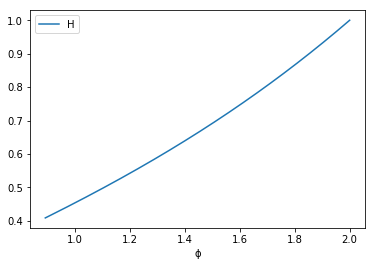

In [3]:
tra1, tra2, n, epsilon = trajectory(2, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='H')
py.xlabel('ϕ')
py.legend()
print("n =", n, end = '\n')
print("ε =", epsilon)

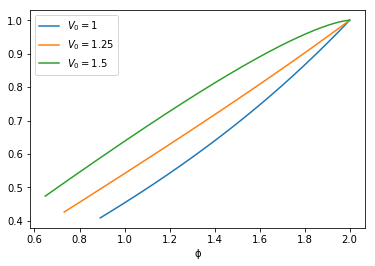

In [4]:
tra1, tra2, n, epsilon = trajectory(2, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$V_0 = 1$')

tra1, tra2, n, epsilon = trajectory(2, 1.25, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$V_0 = 1.25$')

tra1, tra2, n, epsilon = trajectory(2, 1.5, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$V_0 = 1.5$')

py.xlabel('ϕ')
py.legend()


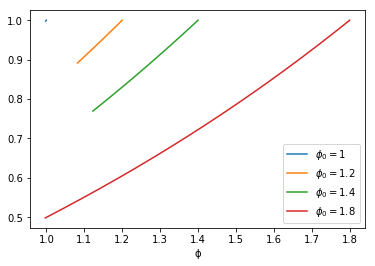

In [5]:
tra1, tra2, n, epsilon = trajectory(1, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$\phi_0 = 1$')

tra1, tra2, n, epsilon = trajectory(1.2, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$\phi_0 = 1.2$')

tra1, tra2, n, epsilon = trajectory(1.4, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$\phi_0 = 1.4$')

tra1, tra2, n, epsilon = trajectory(1.8, 1, 1)
phi, H = tra1[0:n+1], tra2[0:n+1]
py.plot(phi, H, label='$\phi_0 = 1.8$')

py.xlabel('ϕ')
py.legend()

Now a spectrum of initial $\phi_0$ values

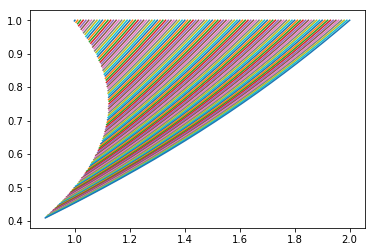

In [6]:
for x in np.linspace(1,2,101):
    tra1, tra2, n, epsilon = trajectory(x, 1, 1)
    phi, H = tra1[0:n+1], tra2[0:n+1]
    py.plot(phi, H)

Deriving $r$ and $n_s$ traectories

ValueError: x, y, and format string must not be None

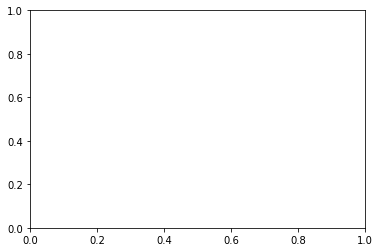

In [77]:
def rtrajectory(trajp, trajH, n, k, V_0):
    H = trajH
    phi = trajp
    r  = [8*(1.5*H[i] - 0.5*(phi[i])**k)/(H[i]**2) for i in range(0, n+1)]
    
tra1, tra2, n, epsilon = trajectory(1, 1, 1)
r = rtrajectory(tra1, tra2, n, 1, 1)
phi = tra1[0:n+1]
py.plot(phi, r)